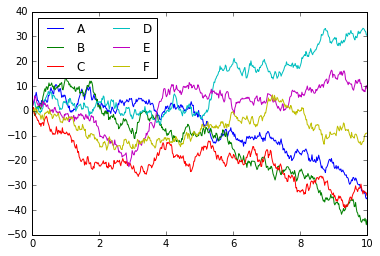

In [1]:
# Seaborn과 Matplotlib의 차이
import matplotlib.pyplot as plt
plt.style.use("classic")
%matplotlib inline
import numpy as np, pandas as pd

# 데이터 생성
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# Matplotlib 기본값으로 데이터 플롯
plt.plot(x, y)
plt.legend("ABCDEF", ncol=2, loc="upper left");

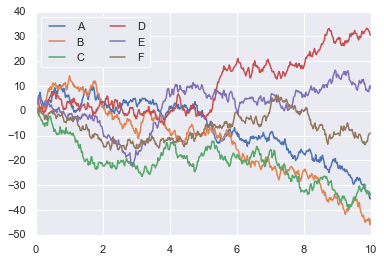

In [2]:
import seaborn as sns
sns.set()

# 위와 동일한 플로팅 코드!
plt.plot(x, y)
plt.legend("ABCDEF", ncol=2, loc="upper left");

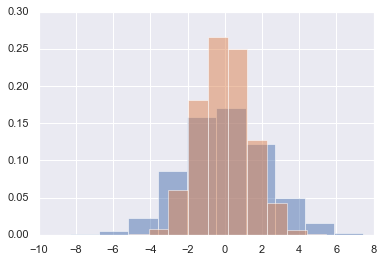

In [3]:
# Seaborn 플롯 탐색하기

# 히스토그램, KDE, 밀도
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], 2000)
data = pd.DataFrame(data, columns=["x", "y"])
for col in "xy":
    plt.hist(data[col], density=True, alpha=0.5)

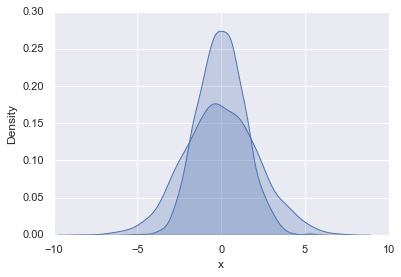

In [4]:
# Kernel density estimation
for col in "xy":
    sns.kdeplot(data[col], shade=True)

C:\Users\Jimmy Son\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jimmy Son\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


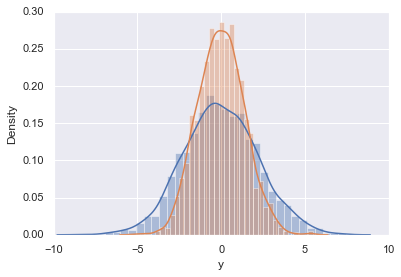

In [5]:
# histogram + kernel density estimation
for col in "xy":
    sns.distplot(data[col]);

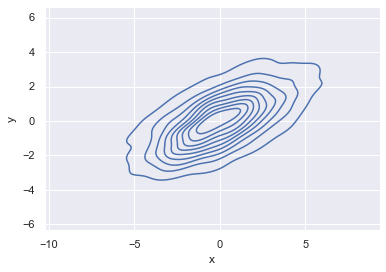

In [6]:
# 2차원 KDE
sns.kdeplot(x=data["x"], y=data["y"]);

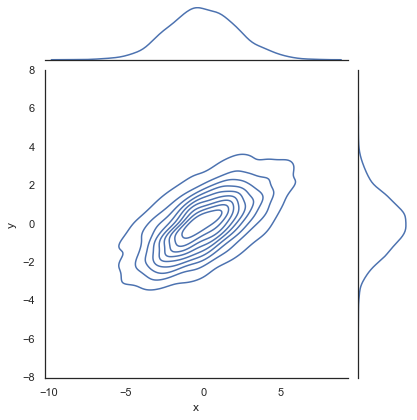

In [7]:
with sns.axes_style("white"):
    sns.jointplot(x="x", y="y", data=data, kind="kde");

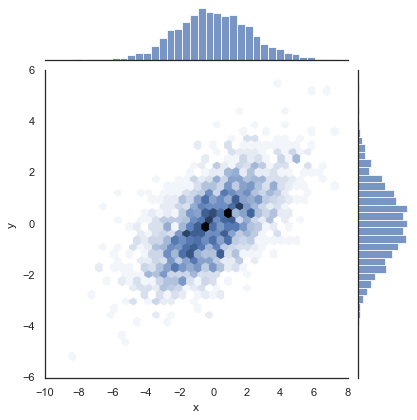

In [8]:
# 육각형 기반 히스토그램
with sns.axes_style("white"):
    sns.jointplot(x="x", y="y", data=data, kind="hex")

In [9]:
# 페어 플롯 (pair plot)
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


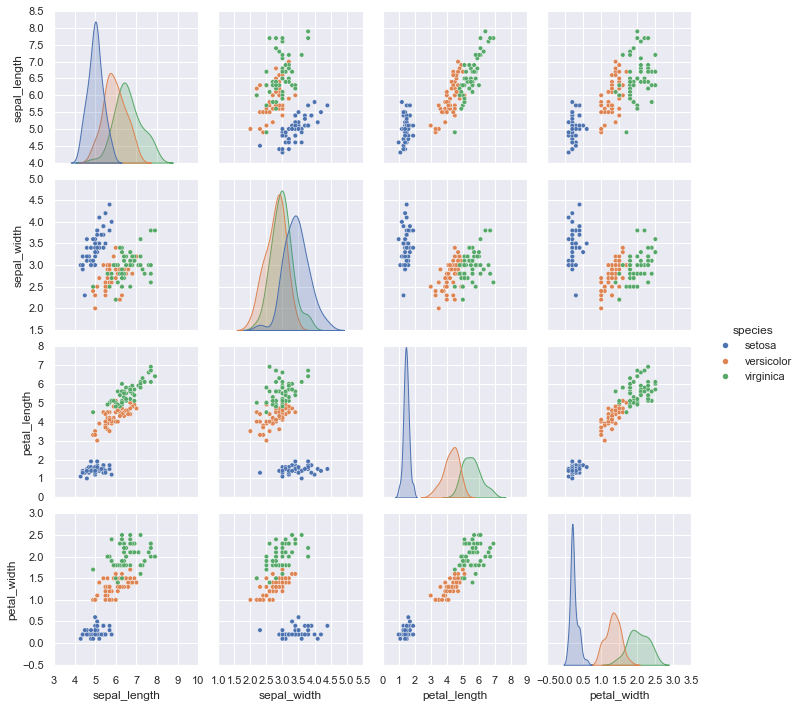

In [10]:
sns.pairplot(iris, hue="species", height=2.5);

In [11]:
# 다면 히스토그램

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


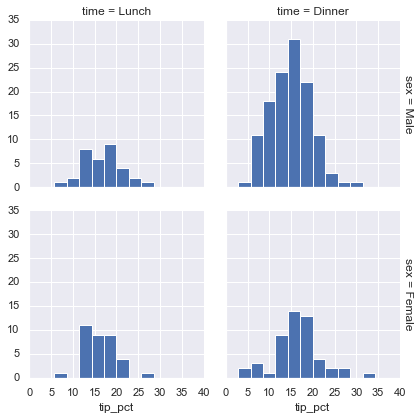

In [12]:
tips["tip_pct"] = 100 * tips["tip"] / tips["total_bill"]
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

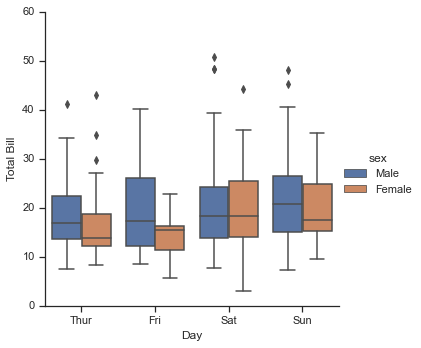

In [13]:
# 요인 플롯
with sns.axes_style(style="ticks"):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

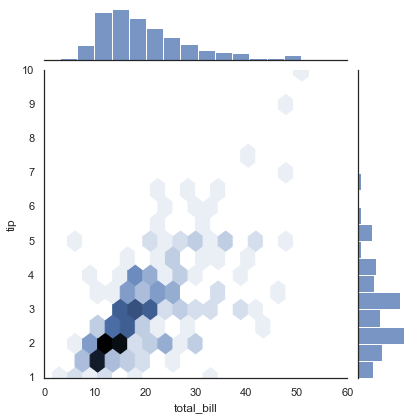

In [14]:
# 결합 분포
with sns.axes_style("white"):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

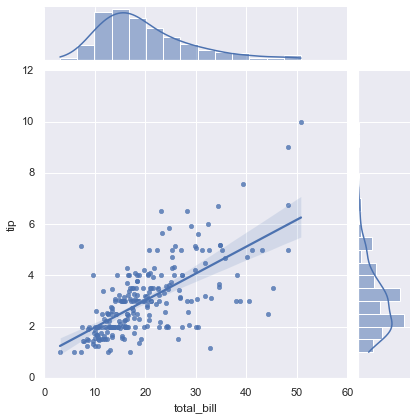

In [15]:
# 결합 플롯 -> 약간의 자동 커널 밀도 추정과 회귀 분석
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

In [16]:
# 막대 플롯
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


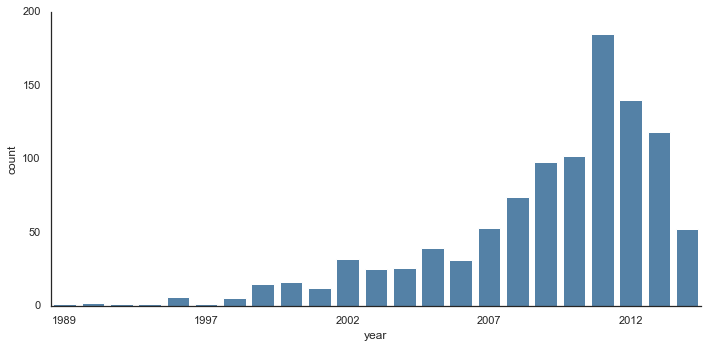

In [17]:
with sns.axes_style("white"):
    g = sns.catplot(x="year", data=planets, aspect=2,
                    kind="count", color="steelblue")
    g.set_xticklabels(step=5)

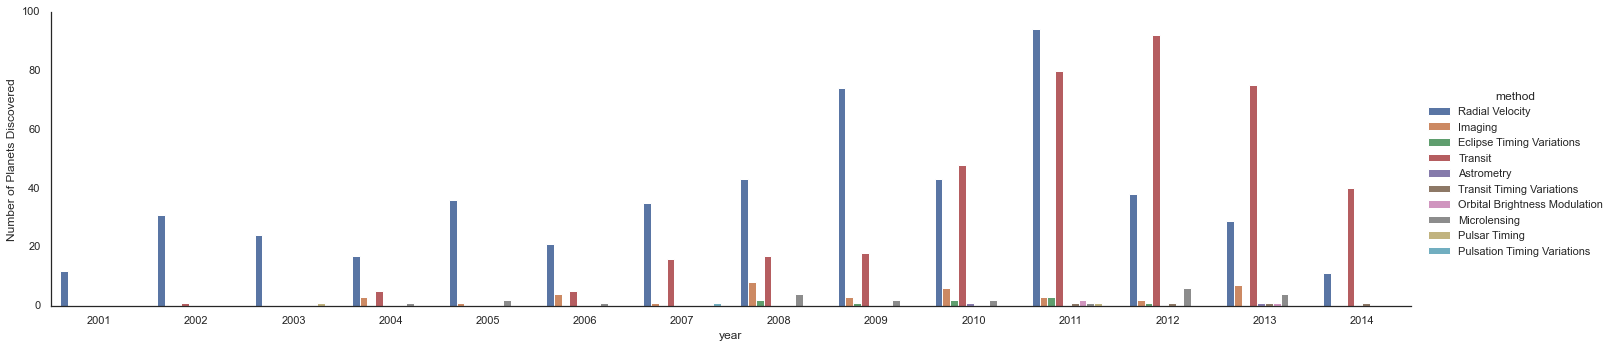

In [18]:
with sns.axes_style("white"):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind="count",
                       hue="method", order=range(2001, 2015))
    g.set_ylabels("Number of Planets Discovered")

In [19]:
# 예제: 마라톤 완주 시간 탐색
# !curl -o marathon-data.csv https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

data = pd.read_csv("marathon-data.csv")
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [20]:
# Pandas -> 시간 열을 파이썬 문자열(ojbect)로 적재
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [21]:
from datetime import timedelta

def convert_time(s):
    h, m, s = map(int, s.split(":"))
    return timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv("marathon-data.csv",
                   converters={"split":convert_time, "final":convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [22]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [23]:
# 시간을 초로 제공하는 열 추가
data["split_sec"] = data["split"].dt.seconds
data["final_sec"] = data["final"].dt.seconds
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938,7731
1,32,M,0 days 01:06:26,0 days 02:09:28,3986,7768
2,31,M,0 days 01:06:49,0 days 02:10:42,4009,7842
3,38,M,0 days 01:06:16,0 days 02:13:45,3976,8025
4,31,M,0 days 01:06:32,0 days 02:13:59,3992,8039


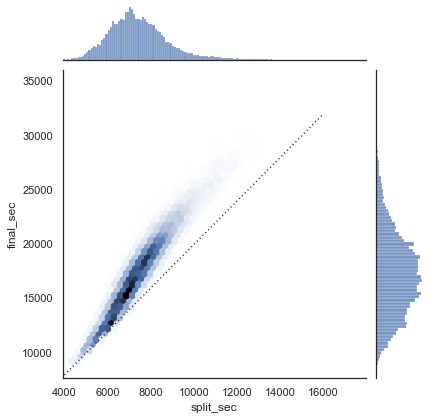

In [24]:
# 데이터 플로팅
with sns.axes_style("white"):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind="hex")
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ":k")

In [25]:
# "split fraction" column to measure the likelihood of positive/negative-split
data["split_frac"] = 1 - 2 * data["split_sec"] / data["final_sec"]
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938,7731,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986,7768,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009,7842,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976,8025,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992,8039,0.006842


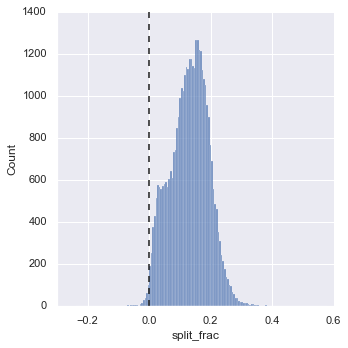

In [26]:
# histogram on split_frac
sns.displot(data["split_frac"], kde=False);
plt.axvline(0, color="k", linestyle="--");

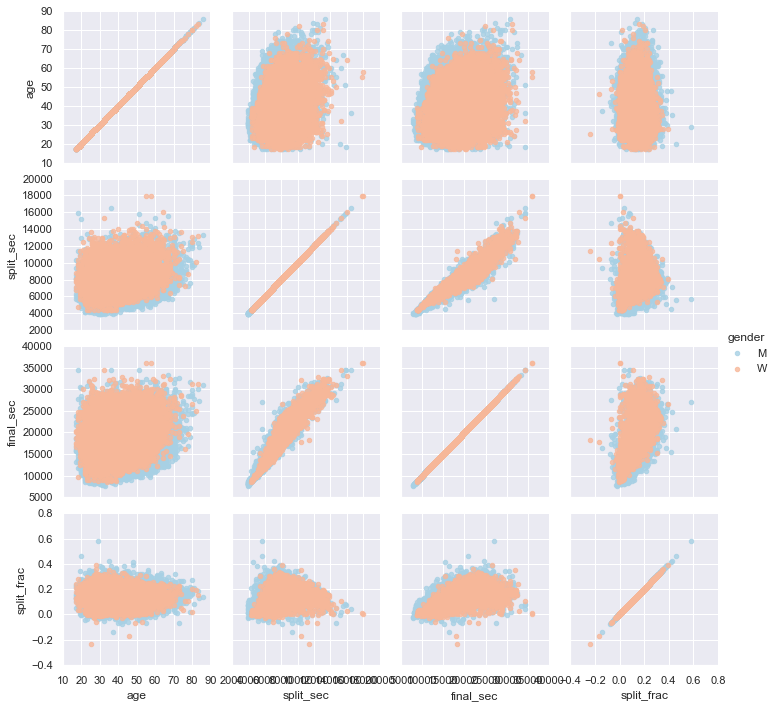

In [27]:
# pairplot on split_frac
g = sns.PairGrid(data=data, vars=["age", "split_sec", "final_sec", "split_frac"],
                 hue="gender", palette="RdBu_r")
g.map(plt.scatter, alpha=0.8)
g.add_legend();

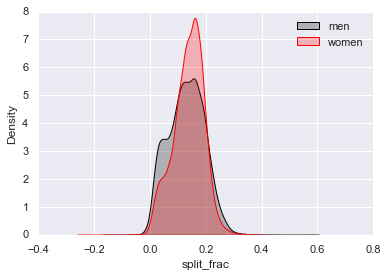

In [28]:
# histogram on split_frac, between genders
sns.kdeplot(data.split_frac[data.gender=="M"], label="men", shade=True, color="black")
sns.kdeplot(data.split_frac[data.gender=="W"], label="women", shade=True, color="red")
plt.legend(frameon=False)
plt.xlabel("split_frac");

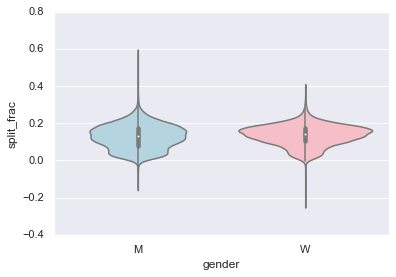

In [29]:
# 분포를 나이의 함수로 살펴보기, 바이올린 플롯
sns.violinplot(x="gender", y="split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [30]:
# 나의를 10살 단위로 지정하는 열 추가
data["age_dec"] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938,7731,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986,7768,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009,7842,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976,8025,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992,8039,0.006842,30


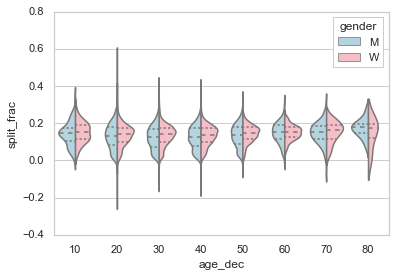

In [31]:
men = (data.gender == "M")
women = (data.gender =="W")

with sns.axes_style(style="whitegrid"):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [32]:
# 80대 해당하는 주자가 몇 안되어 적은 양의 데이터로 분포를 추정
(data.age > 80).sum()

7

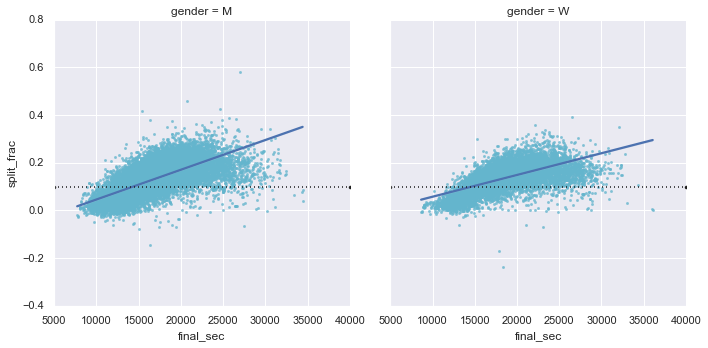

In [33]:
# negative-split 주자 데이터
g = sns.lmplot(x="final_sec", y="split_frac", col="gender", data=data,
               markers=".", scatter_kws=dict(color="c"))
g.map(plt.axhline, y=0.1, color="k", ls=":");